In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from pandas import Series,DataFrame
from sklearn.decomposition import PCA
# Data from Kaggle
# https://www.kaggle.com/usfundamentals/us-stocks-fundamentals
indicator_file = '../data/us-stocks-fundamentals/indicators_by_company.csv'
label_file = '../data/us-stocks-fundamentals/companies.csv'
# For Visualization
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import scipy.stats as stats
np.random.seed(78)
matplotlib.style.use('ggplot')

In [2]:
ind_df=pd.read_csv(indicator_file)
ind_df.head()

,company_id,indicator_id,2010,2011,2012,2013,2014,2015,2016
0,1000045,AccountsPayableAndAccruedLiabilitiesCurrentAnd...,NaN,6612429.0,7405579.0,8924919.0,7841070.0,5839000.0,NaN
1,1000045,AccumulatedDepreciationDepletionAndAmortizatio...,NaN,NaN,2111343.0,2242703.0,2236449.0,2462000.0,NaN
2,1000045,AdjustmentForAmortization,NaN,NaN,-11482251.0,-13490892.0,-13852305.0,-13811000.0,NaN
3,1000045,Assets,NaN,257236034.0,263835468.0,283429579.0,302528591.0,325309000.0,NaN
4,1000045,AssetsHeldForSaleAtCarryingValue,NaN,1373001.0,1203664.0,1696330.0,NaN,NaN,NaN


In [3]:
df_comp_count = ind_df[['company_id', 'indicator_id', '2015']].dropna(
).groupby('indicator_id')['company_id'].count().sort_values(ascending=False).head(20)
df_comp_count

indicator_id
LiabilitiesAndStockholdersEquity                                            6012
Assets                                                                      5997
StockholdersEquity                                                          5503
RetainedEarningsAccumulatedDeficit                                          5500
NetIncomeLoss                                                               5492
CashAndCashEquivalentsAtCarryingValue                                       5490
CashAndCashEquivalentsPeriodIncreaseDecrease                                5151
CommonStockSharesAuthorized                                                 5114
CommonStockValue                                                            4916
CommonStockSharesIssued                                                     4901
PropertyPlantAndEquipmentNet                                                4808
CommonStockParOrStatedValuePerShare                                         4763
Liabilities    

In [4]:
pop_indicators = list(df_comp_count.keys())
pop_indicators

['LiabilitiesAndStockholdersEquity',
 'Assets',
 'StockholdersEquity',
 'RetainedEarningsAccumulatedDeficit',
 'NetIncomeLoss',
 'CashAndCashEquivalentsAtCarryingValue',
 'CashAndCashEquivalentsPeriodIncreaseDecrease',
 'CommonStockSharesAuthorized',
 'CommonStockValue',
 'CommonStockSharesIssued',
 'PropertyPlantAndEquipmentNet',
 'CommonStockParOrStatedValuePerShare',
 'Liabilities',
 'IncomeTaxExpenseBenefit',
 'AssetsCurrent',
 'LiabilitiesCurrent',
 'OperatingIncomeLoss',
 'CommonStockSharesOutstanding',
 'AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment',
 'PropertyPlantAndEquipmentGross']

In [5]:
pivot_df = ind_df.pivot(index='company_id',columns='indicator_id',values='2015')

In [6]:
company_feats_df=pivot_df[pop_indicators].dropna()

In [7]:
company_feats_df.head()

indicator_id,LiabilitiesAndStockholdersEquity,Assets,StockholdersEquity,RetainedEarningsAccumulatedDeficit,NetIncomeLoss,CashAndCashEquivalentsAtCarryingValue,CashAndCashEquivalentsPeriodIncreaseDecrease,CommonStockSharesAuthorized,CommonStockValue,CommonStockSharesIssued,PropertyPlantAndEquipmentNet,CommonStockParOrStatedValuePerShare,Liabilities,IncomeTaxExpenseBenefit,AssetsCurrent,LiabilitiesCurrent,OperatingIncomeLoss,CommonStockSharesOutstanding,AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment,PropertyPlantAndEquipmentGross
company_id,,,,,,,,,,,,,,,,,,,,
2034,5.407780e+08,5.407780e+08,3.044420e+08,1.948040e+08,3.476600e+07,6.682800e+07,32808000.0,75000000.0,296000.0,29595000.0,1.004400e+07,0.01,2.363360e+08,19088000.0,3.526610e+08,9.890600e+07,5.802800e+07,29595000.0,1.066400e+07,2.070800e+07
2178,2.432150e+08,2.432150e+08,1.525100e+08,1.403950e+08,-1.275000e+06,9.187700e+07,11693000.0,7500000.0,422000.0,4217596.0,5.971500e+07,0.10,9.070500e+07,-770000.0,1.765370e+08,8.019700e+07,-2.359000e+06,4217596.0,1.535210e+08,2.132360e+08
2969,1.743810e+10,1.743810e+10,7.249000e+09,1.058040e+10,1.277900e+09,2.064000e+08,-130200000.0,300000000.0,249400000.0,249455584.0,9.636900e+09,1.00,1.005700e+10,415900000.0,2.910800e+09,3.648100e+09,1.699100e+09,215359113.0,1.071770e+10,2.035460e+10
4127,3.719400e+09,3.719400e+09,3.159200e+09,1.469200e+09,7.983000e+08,1.043600e+09,237800000.0,525000000.0,47600000.0,219000000.0,8.264000e+08,0.25,5.602000e+08,225300000.0,1.914700e+09,4.639000e+08,1.023100e+09,190300000.0,7.590000e+08,1.585400e+09
6176,5.061560e+08,5.061560e+08,2.114230e+08,1.297420e+08,1.373000e+06,9.512200e+07,-1976000.0,20000000.0,10440000.0,10440000.0,1.469130e+08,1.00,2.947330e+08,2633000.0,2.196820e+08,8.133300e+07,5.047000e+06,10440000.0,1.805780e+08,3.274910e+08


In [8]:
len(company_feats_df)

948

In [9]:
data_mat = np.array(company_feats_df)

In [10]:
data_mat.shape

(948, 20)

In [11]:
# z-score (whiten)
#
# We could
# centered_data_mat = (data_mat - data_mat.mean(axis=0))
# subtract the means of each variable
# std_data_mat = centered_data_mat.std(axis=0)
# compute the std and devide by it:
# zmat = centered_data_mat*(std_data_mat**(-1))
# This does it in one shot
zmat = stats.zscore(data_mat,axis=0)

In [12]:
zmat.shape

(948, 20)

In [13]:
# Compute the covariance matrix
# Since we already subtracted mean
# Sigma = np.dot(zmat.T,zmat)*(1/zmat.shape[0])
# Again this computes it in one shot
Sigma = np.cov(zmat.T)

In [14]:
U, S, V = np.linalg.svd(Sigma)

In [15]:
D = S**(0.5)

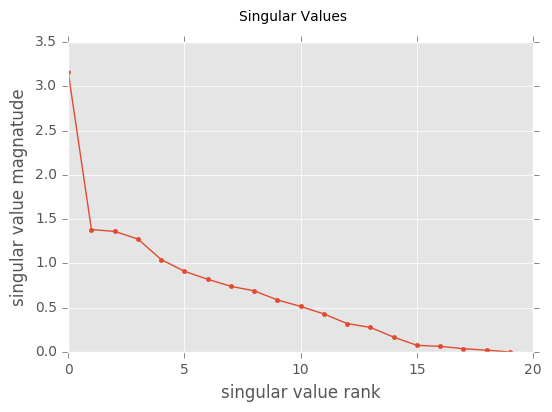

In [16]:
fig = plt.figure()
fig.suptitle('Singular Values')
ax = fig.add_subplot(111)
ax.plot(D,'.-')
ax.set_xlabel('singular value rank')
ax.set_ylabel('singular value magnatude')

In [17]:
energies = (S.cumsum())/(zmat.shape[1])

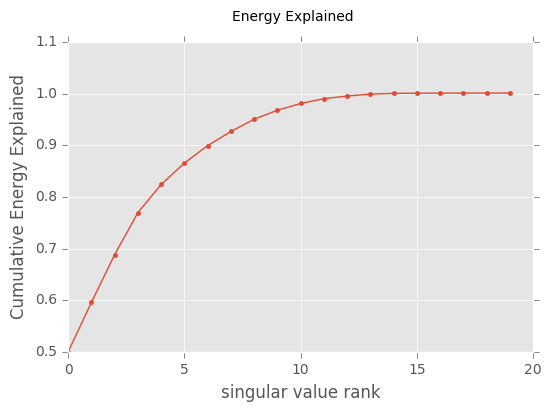

In [18]:
fig = plt.figure()
fig.suptitle('Energy Explained')
ax = fig.add_subplot(111)
ax.plot(energies,'.-')
ax.set_xlabel('singular value rank')
ax.set_ylabel('Cumulative Energy Explained')

In [19]:
V[:2,:].shape

(2, 20)

In [20]:
projected_2D_data = np.dot(zmat,-V[:2,:].T)
projected_2D_data.shape

(948, 2)

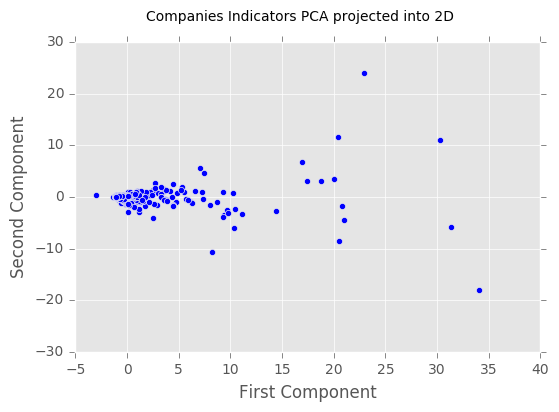

In [21]:
fig = plt.figure()
fig.suptitle('Companies Indicators PCA projected into 2D')
ax = fig.add_subplot(111)
ax.scatter(projected_2D_data[:,0],projected_2D_data[:,1])
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')

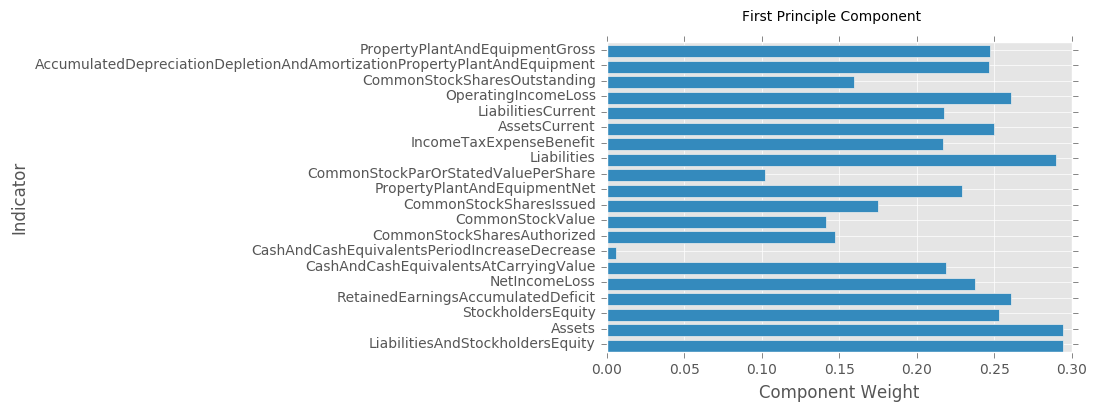

In [22]:
component = 0
fig = plt.figure()
fig.suptitle('First Principle Component')
ax = fig.add_subplot(111)
ax.barh(range(zmat.shape[1]),-V[component,:])
ax.set_yticks(np.arange(zmat.shape[1])+0.5)
ax.set_yticklabels(pop_indicators,rotation='horizontal')
ax.set_ylabel('Indicator')
ax.set_xlabel('Component Weight')

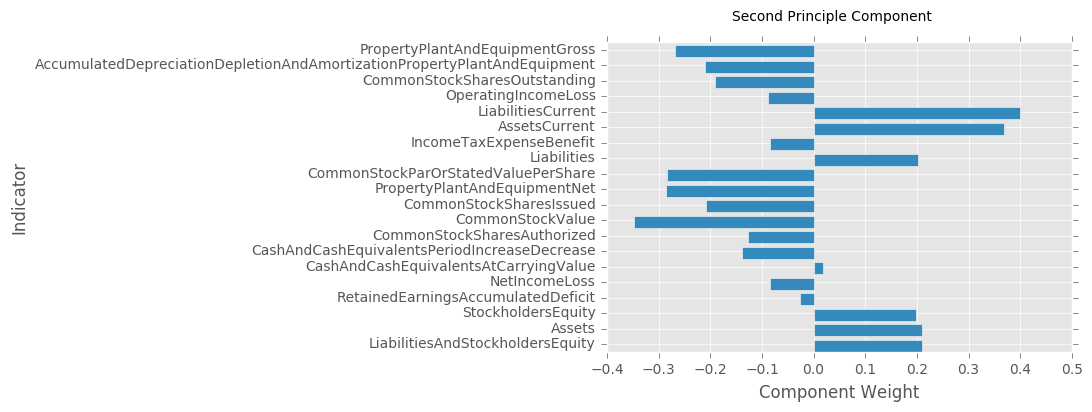

In [23]:
component = 1
fig = plt.figure()
fig.suptitle('Second Principle Component')
ax = fig.add_subplot(111)
ax.barh(range(zmat.shape[1]),-V[component,:])
ax.set_yticks(np.arange(zmat.shape[1])+0.5)
ax.set_yticklabels(pop_indicators,rotation='horizontal')
ax.set_ylabel('Indicator')
ax.set_xlabel('Component Weight')

In [24]:
company_ids = company_feats_df.index

In [25]:
label_df=pd.read_csv(label_file)
label_df.head()

,company_id,name_latest,names_previous
0,1000045,Nicholas Financial Inc,NaN
1,1000180,Sandisk Corp,NaN
2,1000209,Medallion Financial Corp,NaN
3,1000228,Henry Schein Inc,NaN
4,1000229,Core Laboratories N V,NaN


In [26]:
label_df.set_index(keys=['company_id'],inplace=True)
label_df.head()

,name_latest,names_previous
company_id,,
1000045,Nicholas Financial Inc,NaN
1000180,Sandisk Corp,NaN
1000209,Medallion Financial Corp,NaN
1000228,Henry Schein Inc,NaN
1000229,Core Laboratories N V,NaN


In [27]:
high_cid = company_ids[projected_2D_data[:,0]>20]

In [28]:
label_df[['name_latest']].loc[high_cid]

,name_latest
company_id,
45012,Halliburton CO
66740,3M CO
100885,Union Pacific Corp
354950,Home Depot Inc
764180,"Altria Group, Inc."
790070,EMC Corp
1156039,"Anthem, Inc."
1571949,"Intercontinental Exchange, Inc."
1613103,Medtronic PLC


In [29]:
comp_pca = PCA(n_components=2,whiten=True)
comp_pca.fit(data_mat)

PCA(copy=True, n_components=2, whiten=True)

In [30]:
alt_projected_2D_data = comp_pca.transform(data_mat)

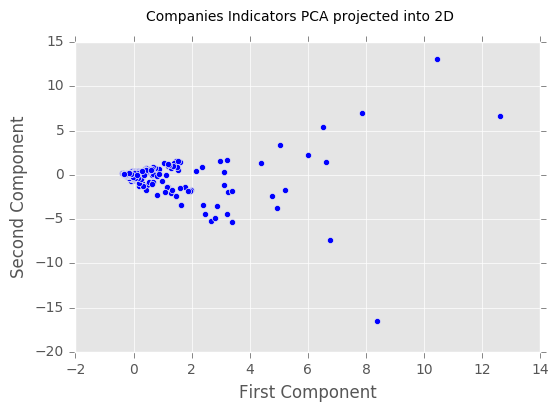

In [31]:
fig = plt.figure()
fig.suptitle('Companies Indicators PCA projected into 2D')
ax = fig.add_subplot(111)
ax.scatter(alt_projected_2D_data[:,0],alt_projected_2D_data[:,1])
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')

In [32]:
comp_pca = PCA(n_components=20,whiten=True)
comp_pca.fit(data_mat)

PCA(copy=True, n_components=20, whiten=True)

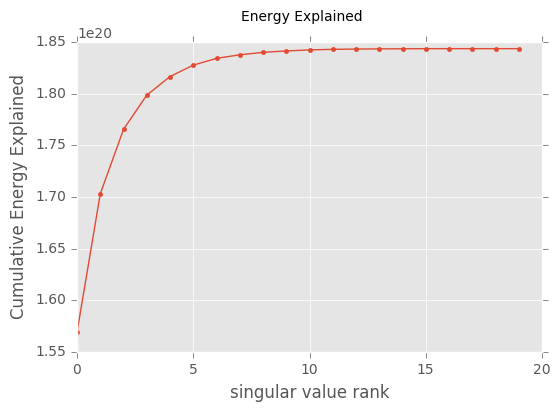

In [33]:
fig = plt.figure()
fig.suptitle('Energy Explained')
ax = fig.add_subplot(111)
ax.plot(comp_pca.explained_variance_.cumsum(),'.-')
ax.set_xlabel('singular value rank')
ax.set_ylabel('Cumulative Energy Explained')

In [34]:
comp_pca.explained_variance_.shape

(20,)